In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
from keras.applications.vgg16 import VGG16

In [3]:
model =   VGG16(weights='imagenet')

553467904/553467096 [==============================] - 12s 0us/step


In [0]:
from keras.applications.vgg16 import preprocess_input,decode_predictions
from keras.preprocessing import image
import cv2
import numpy as np

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
img_path = '/content/drive/My Drive/IMG_1840.JPG'

In [0]:
img = image.load_img(img_path, target_size=(224, 224))

In [0]:
x = image.img_to_array(img)

In [0]:
x = np.expand_dims(x, axis=0)

In [0]:
x = preprocess_input(x)

In [0]:
preds = model.predict(x)

In [17]:
print('Predicted: ',decode_predictions(preds,top=5)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted:  [('n01592084', 'chickadee', 0.69522333), ('n01580077', 'jay', 0.14509298), ('n01534433', 'junco', 0.119893715), ('n01560419', 'bulbul', 0.01152285), ('n01582220', 'magpie', 0.00915733)]


In [18]:
np.argmax(preds[0])

19

In [0]:
bird_out = model.output[:,19]

In [0]:
last_conv_layer = model.get_layer('block5_conv3')

In [0]:
from keras import backend as K
grads = K.gradients(bird_out, last_conv_layer.output)[0]

In [0]:
pooled_grads = K.mean(grads, axis=(0, 1, 2))

In [0]:
iterate = K.function([model.input],
[pooled_grads, last_conv_layer.output[0]])

In [0]:
pooled_grads_value, conv_layer_output_value = iterate([x])

In [0]:
for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value,axis=-1)

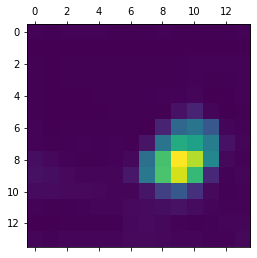

In [31]:
import matplotlib.pyplot as plt
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [0]:
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img

In [34]:
cv2.imwrite('/content/drive/My Drive/img_1840_heat_map_super_imp.jpg',superimposed_img)

True